In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "parisrohan/credit-score-classification",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1167322933.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'credit-score-classification' dataset.
First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            182

/usr/local/lib/python3.12/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


In [88]:
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


# Numerical Analysis

In [89]:
num_col=[col for col in df.columns if df[col].dtype in ['int64', 'float64']]

num_col

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

In [90]:
print('missing value')
for col in num_col :
    print(f"{col} : {df[col].isna().sum()}")

missing value
Monthly_Inhand_Salary : 15002
Num_Bank_Accounts : 0
Num_Credit_Card : 0
Interest_Rate : 0
Delay_from_due_date : 0
Num_Credit_Inquiries : 1965
Credit_Utilization_Ratio : 0
Total_EMI_per_month : 0


In [91]:
for col in num_col:
    if(df[col].isna().sum()>0):
        mean_val = df[col].mean()
        median_val = df[col].median()

        print(f"Kolom: {col}")
        print(f"  Missing: {df[col].isna().sum()}")
        print(f"  Mean   : {mean_val:.2f}")
        print(f"  Median : {median_val:.2f}")
        print("-" * 40)

Kolom: Monthly_Inhand_Salary
  Missing: 15002
  Mean   : 4194.17
  Median : 3093.75
----------------------------------------
Kolom: Num_Credit_Inquiries
  Missing: 1965
  Mean   : 27.75
  Median : 6.00
----------------------------------------


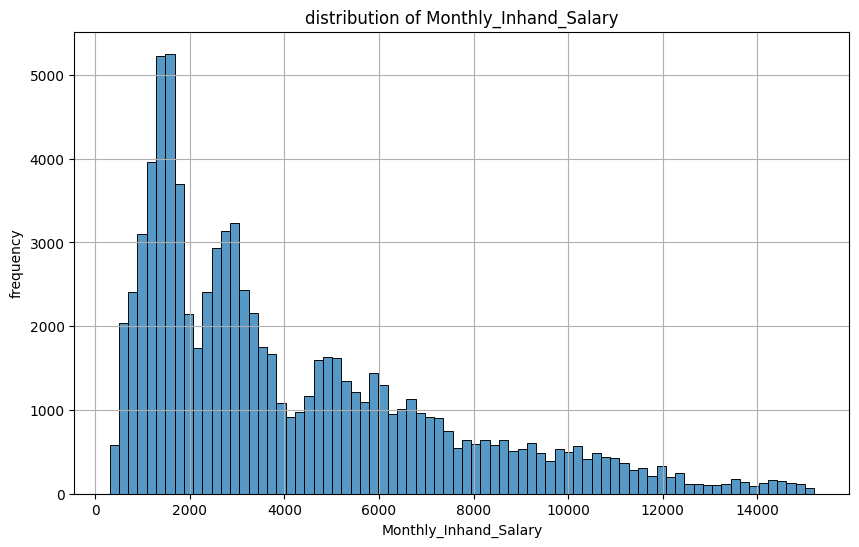

In [92]:

plt.figure(figsize=(10,6))
sns.histplot(data=df['Monthly_Inhand_Salary'])
plt.title(f'distribution of Monthly_Inhand_Salary')
plt.ylabel('frequency')
plt.xlabel('Monthly_Inhand_Salary')
plt.grid(True)
plt.show()


In [93]:
df['Num_Credit_Inquiries'].head(10)

,Num_Credit_Inquiries
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
5,4.0
6,4.0
7,4.0
8,2.0
9,2.0


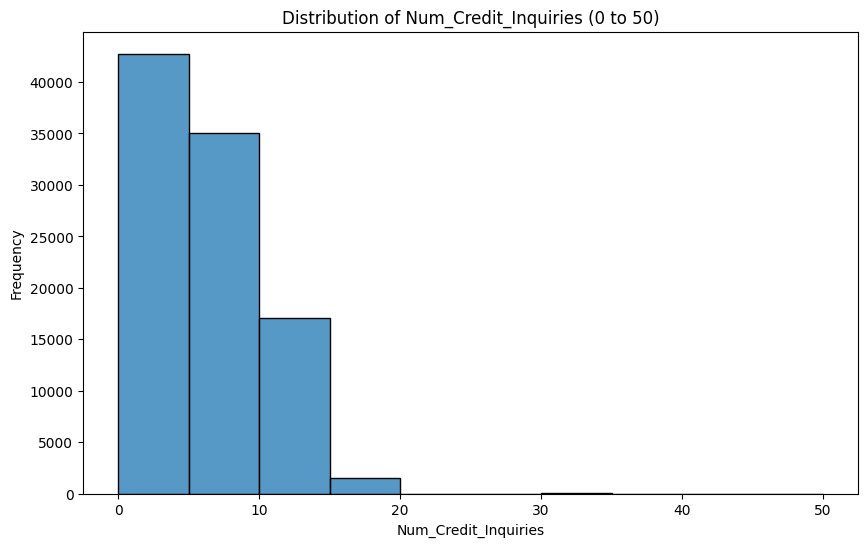

In [94]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Num_Credit_Inquiries'], bins=10, binrange=(0, 50))
plt.title('Distribution of Num_Credit_Inquiries (0 to 50)')
plt.ylabel('Frequency')
plt.xlabel('Num_Credit_Inquiries')
plt.show()

In [95]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)
df[num_col]=imputer.fit_transform(df[num_col])

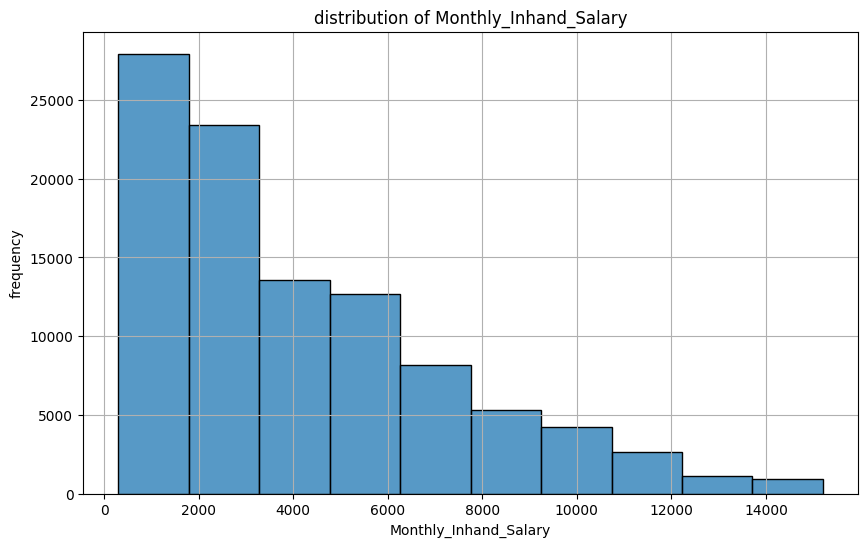

In [96]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Monthly_Inhand_Salary'], bins=10)
plt.title(f'distribution of Monthly_Inhand_Salary')
plt.ylabel('frequency')
plt.xlabel('Monthly_Inhand_Salary')
plt.grid(True)
plt.show()


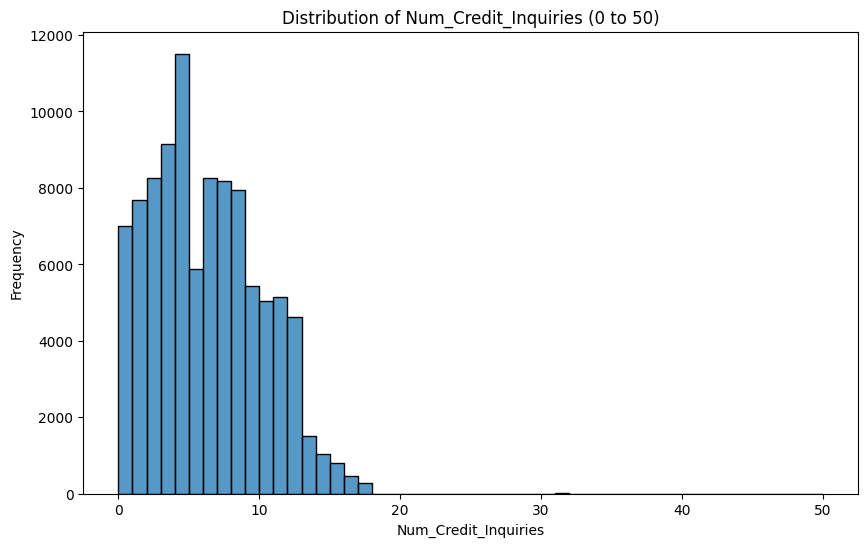

In [97]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Num_Credit_Inquiries'], bins=50, binrange=(0, 50))
plt.title('Distribution of Num_Credit_Inquiries (0 to 50)')
plt.ylabel('Frequency')
plt.xlabel('Num_Credit_Inquiries')
plt.show()

In [98]:
num_col

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

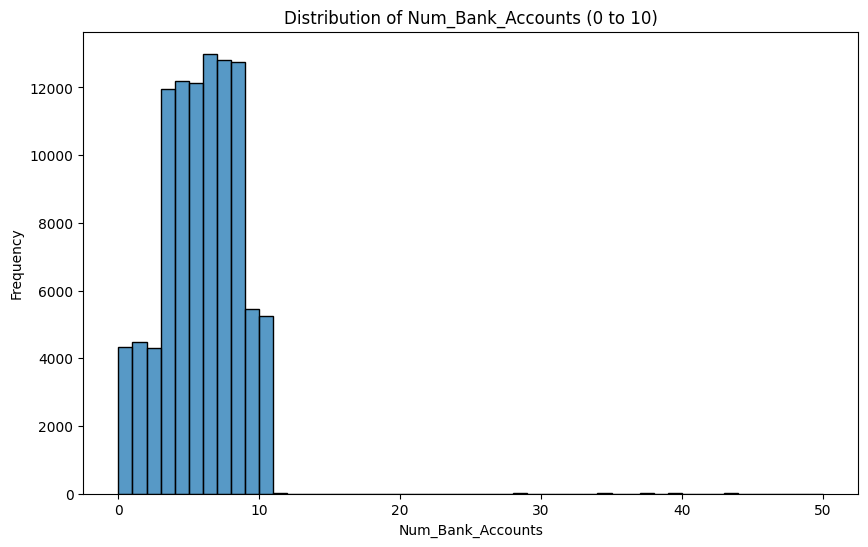

In [99]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Num_Bank_Accounts'], bins=50, binrange=(0, 50))
plt.title('Distribution of Num_Bank_Accounts (0 to 10)')
plt.ylabel('Frequency')
plt.xlabel('Num_Bank_Accounts')
plt.show()

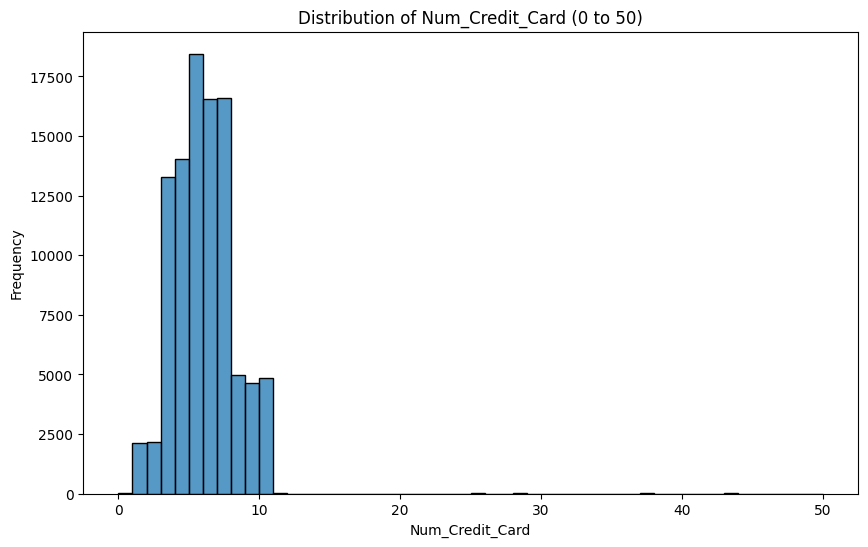

In [100]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Num_Credit_Card'], bins=50, binrange=(0, 50))
plt.title('Distribution of Num_Credit_Card (0 to 50)')
plt.ylabel('Frequency')
plt.xlabel('Num_Credit_Card')
plt.show()

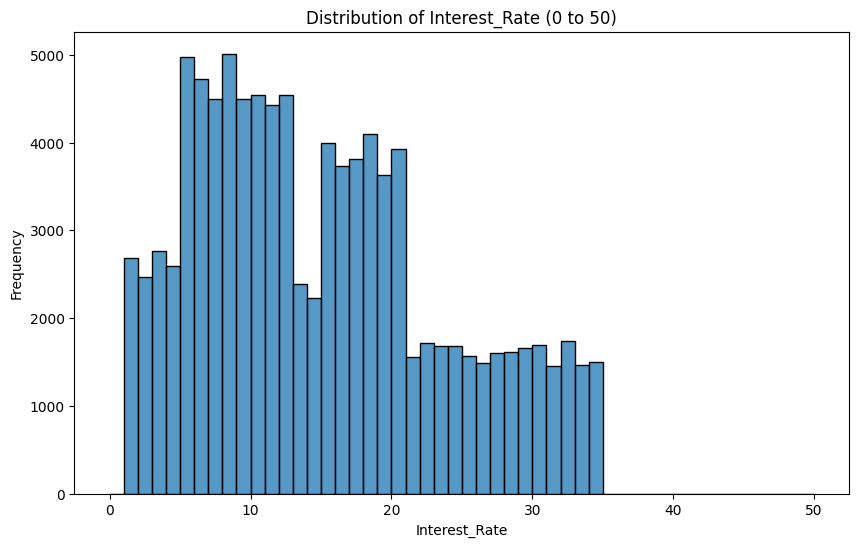

In [101]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Interest_Rate'], bins=50, binrange=(0, 50))
plt.title('Distribution of Interest_Rate (0 to 50)')
plt.ylabel('Frequency')
plt.xlabel('Interest_Rate')
plt.show()

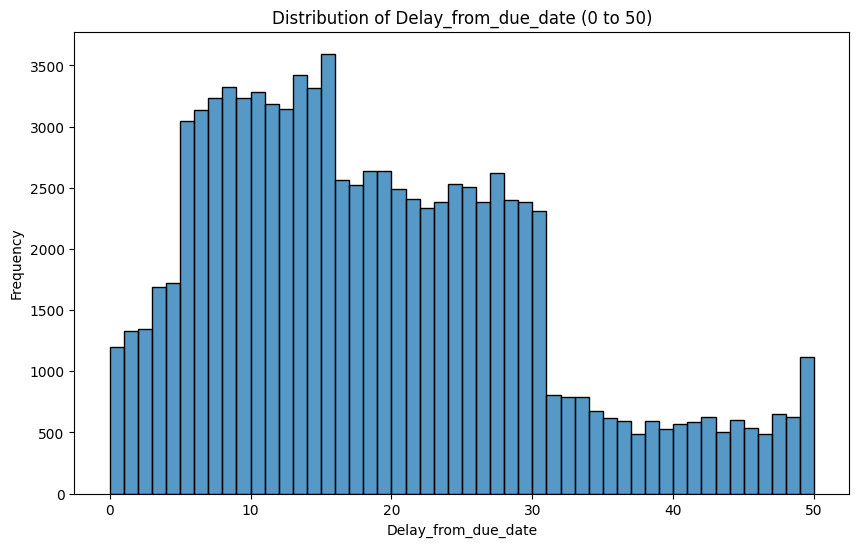

In [102]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Delay_from_due_date'], bins=50, binrange=(0, 50))
plt.title('Distribution of Delay_from_due_date (0 to 50)')
plt.ylabel('Frequency')
plt.xlabel('Delay_from_due_date')
plt.show()

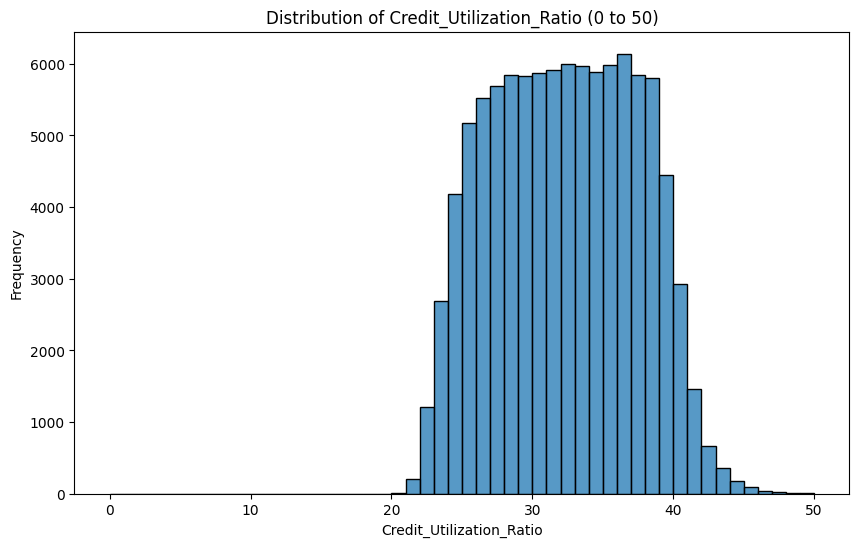

In [103]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Credit_Utilization_Ratio'], bins=50, binrange=(0, 50))
plt.title('Distribution of Credit_Utilization_Ratio (0 to 50)')
plt.ylabel('Frequency')
plt.xlabel('Credit_Utilization_Ratio')
plt.show()

In [104]:
df.drop(columns=['ID','Customer_ID','Name', 'SSN'], inplace=True)

In [105]:
month_order = ['January', 'February', 'March', 'April', 'May']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

In [106]:
monthly_avg = df.groupby('Month')['Total_EMI_per_month'].mean().reset_index()

print(monthly_avg)

      Month  Total_EMI_per_month
0   January          1303.781040
1  February          1621.135569
2     March          1365.147662
3     April          1232.813325
4       May          1397.237947


/tmp/ipython-input-3997454994.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = df.groupby('Month')['Total_EMI_per_month'].mean().reset_index()


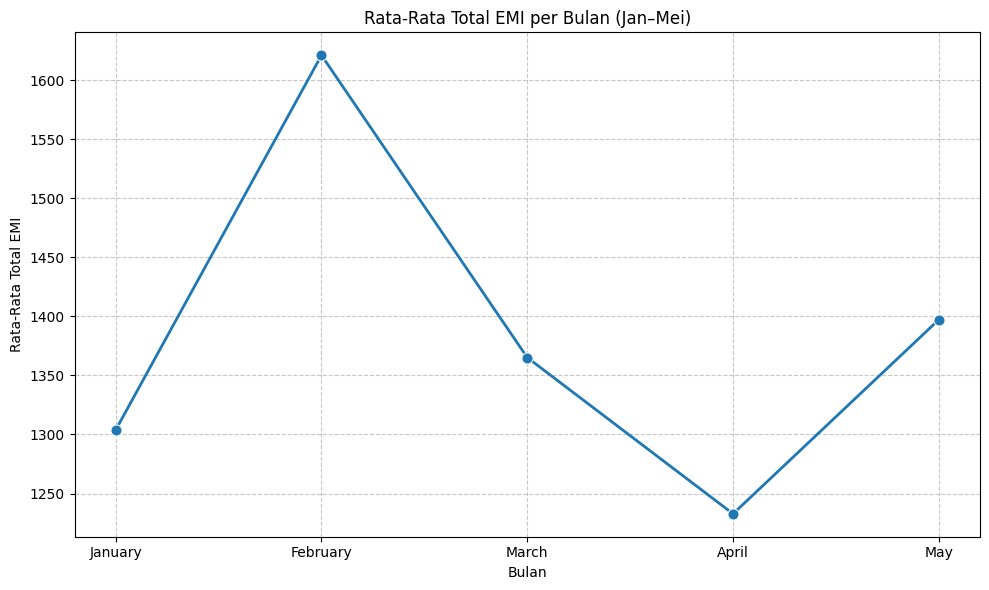

In [107]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Total_EMI_per_month', marker='o', linewidth=2, markersize=8)
plt.title('Rata-Rata Total EMI per Bulan (Jan–Mei)')
plt.ylabel('Rata-Rata Total EMI')
plt.xlabel('Bulan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Categorial Analysis

In [108]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Month                     62500 non-null   category
 1   Age                       100000 non-null  object  
 2   Occupation                100000 non-null  object  
 3   Annual_Income             100000 non-null  object  
 4   Monthly_Inhand_Salary     100000 non-null  float64 
 5   Num_Bank_Accounts         100000 non-null  float64 
 6   Num_Credit_Card           100000 non-null  float64 
 7   Interest_Rate             100000 non-null  float64 
 8   Num_of_Loan               100000 non-null  object  
 9   Type_of_Loan              88592 non-null   object  
 10  Delay_from_due_date       100000 non-null  float64 
 11  Num_of_Delayed_Payment    92998 non-null   object  
 12  Changed_Credit_Limit      100000 non-null  object  
 13  Num_Credit_Inquiries      1000

In [113]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,2968.995917,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,2299.772750,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,3787.910500,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [109]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Hapus kolom target jika ada
if 'Credit_Score' in categorical_cols:
    categorical_cols.remove('Credit_Score')

categorical_cols

['Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [110]:
print('a unique and missing value every column')
for col in categorical_cols :
    print(f"{col} : {df[col].nunique()}")
    print(f"niai null {col} : {df[col].isna().sum()}")
    print('-'*20)

a unique and missing value every column
Age : 1788
niai null Age : 0
--------------------
Occupation : 16
niai null Occupation : 0
--------------------
Annual_Income : 18940
niai null Annual_Income : 0
--------------------
Num_of_Loan : 434
niai null Num_of_Loan : 0
--------------------
Type_of_Loan : 6260
niai null Type_of_Loan : 11408
--------------------
Num_of_Delayed_Payment : 749
niai null Num_of_Delayed_Payment : 7002
--------------------
Changed_Credit_Limit : 4384
niai null Changed_Credit_Limit : 0
--------------------
Credit_Mix : 4
niai null Credit_Mix : 0
--------------------
Outstanding_Debt : 13178
niai null Outstanding_Debt : 0
--------------------
Credit_History_Age : 404
niai null Credit_History_Age : 9030
--------------------
Payment_of_Min_Amount : 3
niai null Payment_of_Min_Amount : 0
--------------------
Amount_invested_monthly : 91049
niai null Amount_invested_monthly : 4479
--------------------
Payment_Behaviour : 7
niai null Payment_Behaviour : 0
---------------

In [ ]:
# Lihat 20 nilai unik pertama
print(df['Age'].unique()[:20])

# Cari nilai yang tidak bisa diubah jadi angka
non_numeric = pd.to_numeric(df['Age'], errors='coerce').isna()
print("\nContoh nilai Age yang tidak valid:")
print(df.loc[non_numeric, 'Age'].unique()[:10])


['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '34_' '7580' '30'
 '30_' '24' '24_' '44' '45' '40' '41']

Contoh nilai Age yang tidak valid:
['28_' '34_' '30_' '24_' '33_' '35_' '31_' '40_' '37_' '54_']


## Handling weired in Age

In [115]:
df['Age'] = df['Age'].str.replace(r'[^0-9]','',regex=True)

df['Age']=pd.to_numeric(df['Age'], errors='coerce')

df.loc[(df['Age'] < 0)| (df['Age'] > 120), 'Age']=np.nan

df['Age']=df['Age'].fillna(df['Age'].median())

df['Age']=df['Age'].astype(int)

In [116]:
print("Tipe data Age sekarang:", df['Age'].dtype)
print("Jumlah missing setelah pembersihan:", df['Age'].isna().sum())
print("Statistik Age:")
print(df['Age'].describe())

Tipe data Age sekarang: int64
Jumlah missing setelah pembersihan: 0
Statistik Age:
count    100000.00000
mean         33.31899
std          10.64554
min          14.00000
25%          25.00000
50%          33.00000
75%          41.00000
max         118.00000
Name: Age, dtype: float64


In [118]:
categorical_cols.remove('Age')

In [117]:
categorical_cols

['Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [119]:
# Lihat 20 nilai unik pertama

print(df['Annual_Income'].unique()[:20])

# Cari nilai yang tidak bisa diubah jadi angka

non_numeric = pd.to_numeric(df['Annual_Income'], errors='coerce').isna()

print("\nContoh nilai Annual_Income yang tidak valid:")

print(df.loc[non_numeric, 'Annual_Income'].unique()[:10])

['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89' '30689.89_'
 '35547.71_' '35547.71' '73928.46' '131313.4' '10909427.0' '34081.38_'
 '34081.38' '114838.41' '114838.41_' '31370.8' '33751.27' '88640.24'
 '88640.24_' '54392.16']

Contoh nilai Annual_Income yang tidak valid:
['34847.84_' '30689.89_' '35547.71_' '34081.38_' '114838.41_' '88640.24_'
 '54392.16_' '8701.545_' '25546.26_' '92047.08_']


In [128]:
df.shape

(100000, 24)

In [130]:
df.drop(columns='Annual_Income', inplace=True)

In [133]:
categorical_cols.remove('Annual_Income')

In [134]:
categorical_cols

['Occupation',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [135]:
print('a unique and missing value every column')
for col in categorical_cols :
    print(f"{col} : {df[col].nunique()}")
    print(f"niai null {col} : {df[col].isna().sum()}")
    print('-'*20)

a unique and missing value every column
Occupation : 16
niai null Occupation : 0
--------------------
Num_of_Loan : 434
niai null Num_of_Loan : 0
--------------------
Type_of_Loan : 6260
niai null Type_of_Loan : 11408
--------------------
Num_of_Delayed_Payment : 749
niai null Num_of_Delayed_Payment : 7002
--------------------
Changed_Credit_Limit : 4384
niai null Changed_Credit_Limit : 0
--------------------
Credit_Mix : 4
niai null Credit_Mix : 0
--------------------
Outstanding_Debt : 13178
niai null Outstanding_Debt : 0
--------------------
Credit_History_Age : 404
niai null Credit_History_Age : 9030
--------------------
Payment_of_Min_Amount : 3
niai null Payment_of_Min_Amount : 0
--------------------
Amount_invested_monthly : 91049
niai null Amount_invested_monthly : 4479
--------------------
Payment_Behaviour : 7
niai null Payment_Behaviour : 0
--------------------
Monthly_Balance : 98792
niai null Monthly_Balance : 1200
--------------------


In [ ]:
df['Monthly_Balance']

,Monthly_Balance
count,98800
unique,98792
top,__-333333333333333333333333333__
freq,9
